# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
DATA_FOLDER = './Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

In [284]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [3]:
# Write your answer here

# Ebola Folder 
DATA_FOLDER_ebola = DATA_FOLDER + '/ebola'
# Directories in the folder
ebola_directories = os.listdir(DATA_FOLDER_ebola)
# Remove License File
del ebola_directories[ebola_directories.index('LICENSE')]

# Names of the columns which contain the total number of daily incidents
data_columns = {'liberia':['Date','Variable', 'National'],
                'sl': ['date','variable', 'National'],
                'guinea':['Date','Description', 'Totals']
               }

### Load All CSV Files Contained In One Folder
TODO : write the explanatory paragraph

In [103]:
# Loads the information relevant to deaths and cases within the csv files contained in the directory for a given country

def load_csv_files_into_dataframe(folder, country):
    country_folder = folder + '/'+ country +'_data'
    csv_files = os.listdir(country_folder)    
    
    all_data = pd.DataFrame()
    
    date = data_columns[country][0]
    description = data_columns[country][1]
    totals = data_columns[country][2]
    
    for i, file in enumerate(csv_files):
        
        daily_csv = pd.read_csv(country_folder + '/' +file)
        
        # Find columns containing death or case keywords
        motives  = daily_csv[description][daily_csv[description].str.contains("death|case|Death|Case")]
        # Create a dictionary with the date and country
        daily_dict = {'Date': file[:10], 'Country':country}
        # Add the motives with corresponding total / national values to the dictionary
        daily_dict.update(dict(zip(motives.tolist(), daily_csv[totals][motives.index].tolist())))
        # Append the dictionary to the dataframe
        all_data = all_data.append(daily_dict, ignore_index = True)
    all_data = all_data.apply(pd.to_numeric, errors = 'ignore')
    all_data.Date = pd.to_datetime(all_data.Date)
    all_data['Month']  = all_data.Date.dt.month
    #all_data.set_index(['Date','Country'], inplace = True)
    return all_data

### General Selection Process 
For each of the countries we pre-selected the columns which contained the keywords death or case. We observed the remaining columns and removed columns which contained to many NaN values. 
For both death and case we then plotted all the columns in cumulative form using cumsum for columns which were not already cumulative. This way it was possible to identify the columns which had the least missing and most coherent data. 

### Liberia Dataset

In [104]:
liberia_data = load_csv_files_into_dataframe(DATA_FOLDER_ebola,'liberia')
liberia_data.head()

,Case Fatality Rate (CFR) - Confirmed & Probable Cases,Country,Cumulative cases among HCW,Cumulative deaths among HCW,Date,New Case/s (Probable),New Case/s (Suspected),New case/s (confirmed),Newly Reported Cases in HCW,Newly Reported deaths in HCW,...,Total Case/s (Probable),Total Case/s (Suspected),Total case/s (confirmed),"Cumulative confirmed, probable and suspected cases","Total death/s in confirmed, probable, suspected cases",Case Fatality Rate (CFR) - Confirmed & Probable Cases,Total Number of Confirmed Cases of Guinean Nationality,Total Number of Confirmed Cases of Sierra Leonean Nationality,"Total death/s in confirmed, probable, suspected cases",Month
0,NaN,liberia,1.0,1.0,2014-06-16,1.0,2.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,NaN,liberia,1.0,1.0,2014-06-17,0.0,2.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2,25.0,liberia,1.0,1.0,2014-06-22,0.0,5.0,5.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,NaN,liberia,2.0,2.0,2014-06-24,0.0,2.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,NaN,liberia,4.0,3.0,2014-06-25,1.0,4.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


### Guinea Dataset

In [107]:
guinea_data = load_csv_files_into_dataframe(DATA_FOLDER_ebola,'guinea')
guinea_data.dropna(thresh = (len(guinea_data)//2), axis = 1, inplace = True)
print(len(guinea_data))
guinea_monthly = guinea_data[['Month']]

guinea_data.head()

22


,Country,Date,New cases of confirmed,New cases of probables,New cases of suspects,Total cases of confirmed,Total cases of probables,Total cases of suspects,Total deaths (confirmed + probables + suspects),Total deaths of confirmed,...,Total deaths of suspects,Total new cases registered so far,New cases of confirmed among health workers,New deaths registered,New deaths registered among health workers,Total case of confirmed among health workers,Total deaths registered among health workers,Total number of hospitalized cases in CTE,Total suspected non-class cases,Month
0,guinea,2014-08-04,4.0,0.0,5.0,351.0,133.0,11.0,363.0,228.0,...,2.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1,guinea,2014-08-26,10.0,NaN,18.0,490.0,141.0,30.0,958.0,292.0,...,2.0,28.0,0.0,5.0,0.0,45.0,26.0,87.0,518.0,8
2,guinea,2014-08-27,10.0,0.0,12.0,499.0,142.0,22.0,438.0,294.0,...,2.0,22.0,0.0,2.0,0.0,45.0,26.0,80.0,518.0,8
3,guinea,2014-08-30,9.0,0.0,15.0,533.0,142.0,32.0,468.0,324.0,...,2.0,24.0,0.0,5.0,0.0,50.0,26.0,82.0,560.0,8
4,guinea,2014-08-31,29.0,8.0,9.0,563.0,150.0,36.0,489.0,337.0,...,2.0,46.0,0.0,3.0,0.0,50.0,26.0,99.0,642.0,8


#### Selecting the Most Relevant Columns For "Cases"

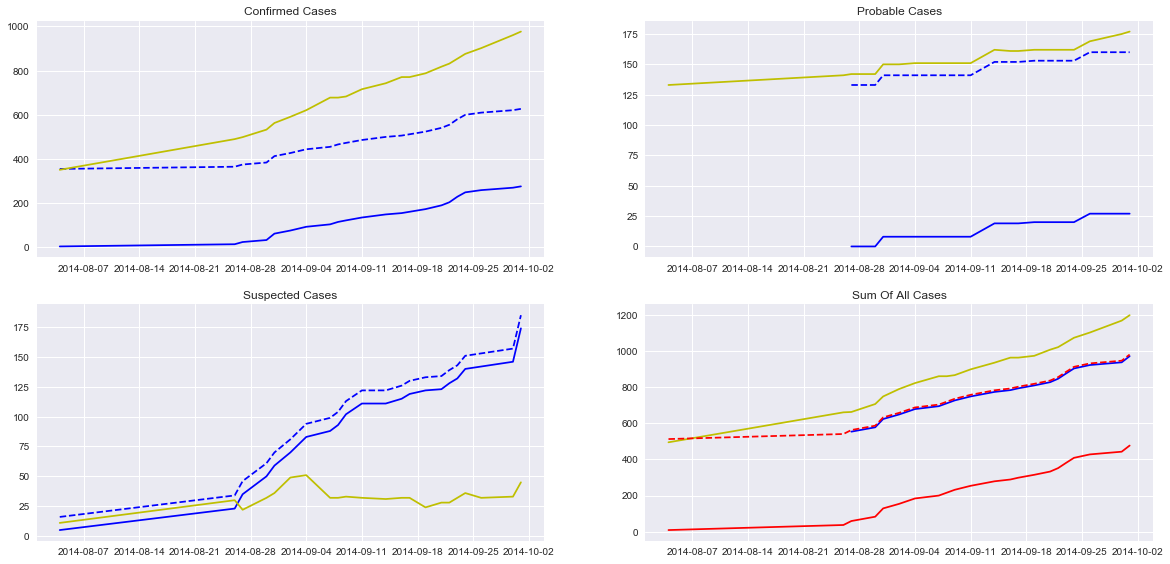

In [132]:
plt.figure(figsize = (20,20))
plt.subplot(421)
plt.plot(np.array(guinea_data['Date']), guinea_data['New cases of confirmed'].cumsum(), 'b') 
plt.plot(np.array(guinea_data['Date']), guinea_data['New cases of confirmed'].cumsum() + guinea_data['Total cases of confirmed'][0], '--b') 
plt.plot(np.array(guinea_data['Date']), guinea_data['Total cases of confirmed'], 'y') 
plt.title('Confirmed Cases')
plt.subplot(422)
plt.plot(np.array(guinea_data['Date']), guinea_data['New cases of probables'].cumsum(), 'b')
plt.plot(np.array(guinea_data['Date']), guinea_data['New cases of probables'].cumsum() + guinea_data['Total cases of probables'][0], '--b')
plt.plot(np.array(guinea_data['Date']), guinea_data['Total cases of probables'], 'y') 
plt.title('Probable Cases')
plt.subplot(423)
plt.plot(np.array(guinea_data['Date']), guinea_data['New cases of suspects'].cumsum(), 'b') 
plt.plot(np.array(guinea_data['Date']), guinea_data['New cases of suspects'].cumsum() +guinea_data['Total cases of suspects'][0], '--b') 
plt.plot(np.array(guinea_data['Date']), guinea_data['Total cases of suspects'], 'y') 
plt.title('Suspected Cases')
plt.subplot(424)
computed_cumsum = guinea_data['New cases of confirmed'].cumsum() + guinea_data['Total cases of confirmed'][0] + guinea_data['New cases of probables'].cumsum() + guinea_data['Total cases of probables'][0] + guinea_data['New cases of suspects'].cumsum() +guinea_data['Total cases of suspects'][0]
given_cumsum = guinea_data['Total cases of confirmed'] +guinea_data['Total cases of probables'] +guinea_data['Total cases of suspects']
plt.plot(guinea_data['Date'], computed_cumsum , 'b') 
plt.plot(guinea_data['Date'], given_cumsum, 'y') 
plt.plot(guinea_data['Date'], guinea_data['Total new cases registered so far'].cumsum() + computed_cumsum[0]  , '--r')
plt.plot(guinea_data['Date'], guinea_data['Total new cases registered so far'].cumsum(), 'r')
plt.title('Sum Of All Cases')

The yellow curves represent the cumulative data which was already provided. The blue curves represent the computation of the cumulative data from the daily incidents. The information is then shifted (dashed curves) based on the initial value of the cumulative data provided to take into account previous cases which were recoreded but not provided in the table. In the final plot (Sum of All Cases) we compare the sum of computed cumulative, the sum of the provided cumulative and the provided Total which we cumulated to obtain the plot. We noticed that the red curve followed the exact same trend as the blue curve. Shifting the curve up by the previous values (here from the sum of the provided cumulative data) we obtain a curve (dashed red) which corresponds exactly to what was computed. Therefore we assume that the red dashed line gives a correct estimation of the cases for Guinea. 

The issue with this is that there might redundancies between the probably, suspected and cumulative cases. There is no way of knowing how many probable or suspected cases are confirmed later on. The values we obtain are an upper limit of the total number of actual cases. The lower limit would only be given by the confirmed cases. 

In [125]:
# Total of all cases
guinea_data['Cases'] = guinea_data['Total new cases registered so far'].cumsum() + computed_cumsum[0]
# Remove the cumulatif probable cases

#

#### Selecting the Most Relevant Columns For "Deaths"

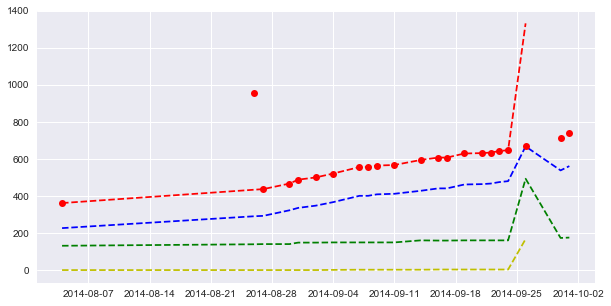

In [224]:
plt.figure(figsize = (10,5))
plt.plot(np.array(guinea_data['Date']), guinea_data['Total deaths of confirmed'], '--b') 
plt.plot(np.array(guinea_data['Date']), guinea_data['Total deaths of probables'], '--g') 
plt.plot(np.array(guinea_data['Date']), guinea_data['Total deaths of suspects'], '--y') 
plt.plot(np.array(guinea_data['Date']), guinea_data['Total deaths of suspects']+guinea_data['Total deaths of probables'] +guinea_data['Total deaths of confirmed'], '--r') 
plt.plot(np.array(guinea_data['Date']), guinea_data['Total deaths (confirmed + probables + suspects)'], 'or') 

The Total deaths provided is represented by the points in red. The computed total deaths is given by the dashed red curve (sum of the blue, green and yellow curves). The trend is quite similar at the start except for an outlyer in the provided total deaths. The compted total however seems to diverge strangely at the end. That is why we decided to keep the provided totals all the while replacing the outlyer around 2014-08-28 by the value computed in the sum.

Here the suspected cases are always equal to zero in the region of interest. The probable cases do not vary which is why we can assume that there no redundancy between this category and the confirmed deaths. Therefore the deaths can be given by the 'Total deaths (confirmed + probables + suspects)' column to which the suss-mentioned cleaning process will be applied.

In [204]:
guinea_data['Deaths'] = guinea_data['Total deaths (confirmed + probables + suspects)']
guinea_data['Totals'] = guinea_data['Total deaths of suspects']+guinea_data['Total deaths of probables'] +guinea_data['Total deaths of confirmed']
# Get the index of the outlyer
outlyer = guinea_data.Deaths.diff()<0
# Shift the index so that it corresponds to the problematic element
outlyer = outlyer.shift(-1)
outlyer = outlyer.index[outlyer == True].tolist()
# Replace the outlyer by none in the table
guinea_data['Deaths'].iloc[outlyer] = guinea_data['Totals'].iloc[outlyer]


,,Cases,Deaths
Date,Country,,
2014-08-04,guinea,513.0,363.0
2014-08-26,guinea,541.0,435.0
2014-08-27,guinea,563.0,438.0
2014-08-30,guinea,587.0,468.0
2014-08-31,guinea,633.0,489.0
2014-09-02,guinea,658.0,501.0
2014-09-04,guinea,688.0,522.0
2014-09-07,guinea,704.0,557.0
2014-09-08,guinea,720.0,557.0


#### Interpolate the data for Guinea

In [396]:
#Functions used to clean and interpolate the data
def interpolate_data(df, clean_df, category, k = 1):
    # Drop nan values
    temp_df = df[np.isfinite(df[category])]

    # Interpolate the data
    x = np.array(temp_df['Days since'].tolist())
    y = np.array(temp_df[category].tolist())
    temp = interpolate.splrep(x,y,s = 0, k = k)
    xnew = np.array(clean_df['Days since'].tolist())
    ynew = interpolate.splev(xnew, temp, der = 0)
    return ynew


def clean_and_interpolate(df, k = 1):
    # Create a Dataframe With All The Dates From Start To Finish
    clean_df = pd.DataFrame(pd.date_range(df['Date'].iloc[0], df['Date'].iloc[-1]).tolist())
    clean_df.rename(columns={0:'Date'}, inplace = True)
    # Get the index of the days 
    clean_df['Days since'] = (clean_df['Date'] - clean_df['Date'][0]).dt.days
    df['Days since'] = (df['Date'] - df['Date'][0]).dt.days
    clean_df['Month']  = clean_df.Date.dt.month
    clean_df['Country']  = df['Country'][0]
    
    # Store the new values in the clean data
    clean_df['Deaths'] = interpolate_data(df, clean_df, 'Deaths', k = 1)
    clean_df['Cases'] = interpolate_data(df, clean_df, 'Cases', k = 1)
    
    #Comparing the Interpolation to the real data
    plt.figure(figsize = (20,10))
    plt.subplot(121)
    plt.plot(clean_df['Days since'], clean_df['Deaths'], 'b')
    #plt.plot(df['Days since'],df['Deaths'], 'ob')
    plt.title('Deaths Interpolation')
    plt.subplot(122)
    plt.plot(clean_df['Days since'], clean_df['Cases'], 'b')
    plt.plot(df['Days since'],df['Cases'], 'ob')
    plt.title('Cases Interpolation')
    plt.show()
    
    return clean_df


#### Final Clean Data For Guinea

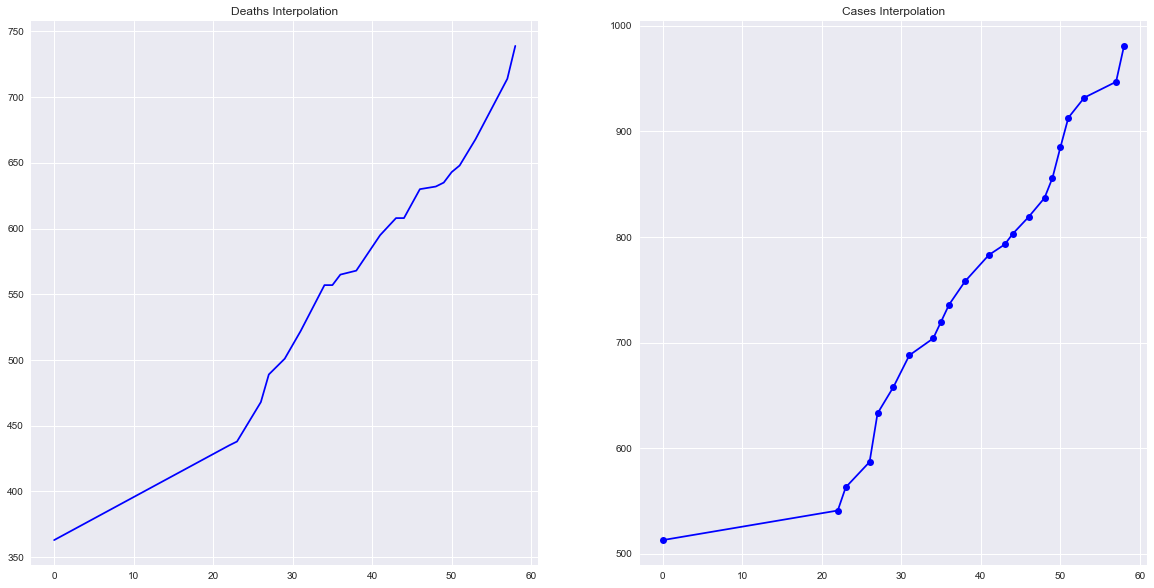

,,Days since,Month,Deaths,Cases
Date,Country,,,,
2014-08-04,guinea,0,8,363.000000,513.000000
2014-08-05,guinea,1,8,366.272727,514.272727
2014-08-06,guinea,2,8,369.545455,515.545455
2014-08-07,guinea,3,8,372.818182,516.818182
2014-08-08,guinea,4,8,376.090909,518.090909


In [397]:
clean_guinea = clean_and_interpolate(guinea_data)
clean_guinea.set_index(['Date','Country'], inplace = True)
clean_guinea.head()

### Sierra Leone Dataset

In [388]:
sl_data = load_csv_files_into_dataframe(DATA_FOLDER_ebola,'sl')

# Clean the data : replace commas for numbers with points and convert back to float
sl_data.cum_noncase = sl_data.cum_noncase.astype(str)
sl_data.cum_noncase = sl_data.cum_noncase.apply(str.replace, args = (',', ''))
sl_data.cum_noncase = sl_data.cum_noncase.astype(float)
sl_data.new_noncase = sl_data.new_noncase.astype(float)

# remove columns with over half of the values which are NAN
sl_data.dropna(thresh = (len(sl_data)//2), axis = 1, inplace = True)
sl_data.head()

,Country,Date,cum_noncase,death_confirmed,death_probable,death_suspected,new_noncase,Month
0,sl,2014-08-12,657.0,264.0,34.0,5.0,4.0,8
1,sl,2014-08-13,680.0,273.0,34.0,5.0,13.0,8
2,sl,2014-08-14,708.0,280.0,34.0,5.0,26.0,8
3,sl,2014-08-15,726.0,287.0,34.0,5.0,15.0,8
4,sl,2014-08-16,741.0,297.0,34.0,5.0,9.0,8


#### Selecting the Most Relevant Columns For "Cases"

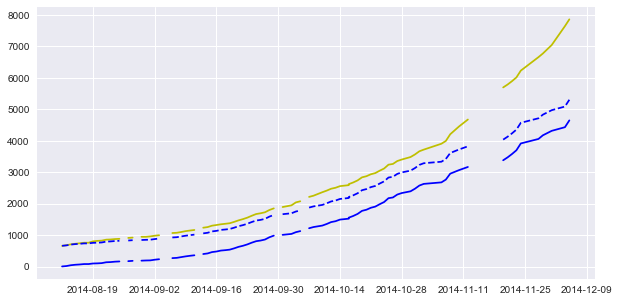

In [389]:
plt.figure(figsize = (10,5))
plt.plot(sl_data['Date'], sl_data['cum_noncase'], 'y')
plt.plot(sl_data['Date'], sl_data['new_noncase'].cumsum(), 'b')
plt.plot(sl_data['Date'], sl_data['new_noncase'].cumsum() +  sl_data['cum_noncase'][0], '--b')

Following the reasoning as previously the most coherent data for the new cases would be to keep the cumulative sum computed after shifting it to take into account previous values. 

In [390]:
sl_data['Cases'] = sl_data['new_noncase'].cumsum() +  sl_data['cum_noncase'][0]

#### Selecting the Most Relevant Columns For "Deaths"

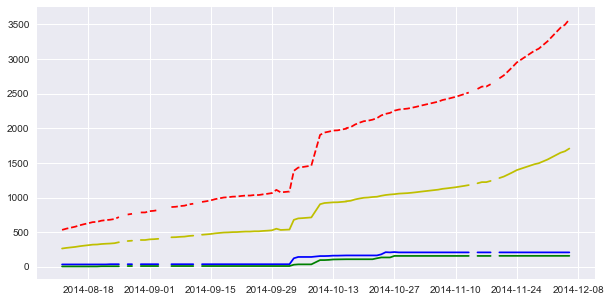

In [391]:
plt.figure(figsize = (10,5))
plt.plot(sl_data['Date'], sl_data['death_confirmed'], 'y')
plt.plot(sl_data['Date'], sl_data['death_probable'], 'b')
plt.plot(sl_data['Date'], sl_data['death_suspected'], 'g')
plt.plot(sl_data['Date'], sl_data['death_confirmed']+sl_data['death_suspected']+sl_data['death_confirmed'], 'r--')

Summing the three types of deaths leads to values which seem much too high for the total deaths. That is why in this case we decided that the deaths would be more correctly represented by the confirmed deaths column only. 

In [392]:
sl_data['Deaths'] = sl_data['death_confirmed']

#### Final Clean Data For Sierra Leone

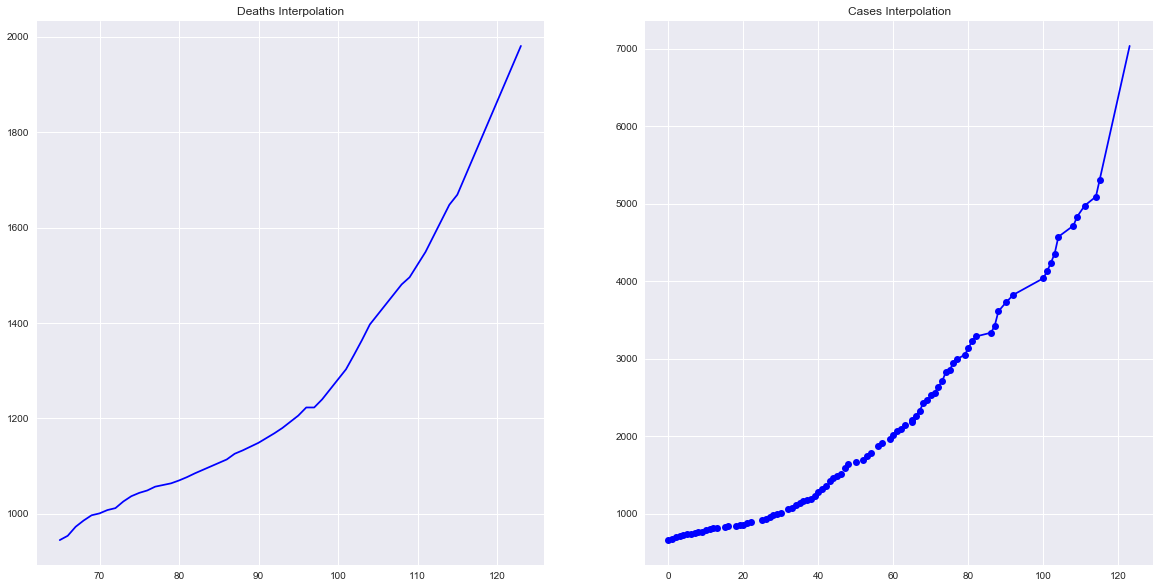

                    Days since  Month  Deaths        Cases
Date       Country                                        
2014-08-12 sl                0      8     NaN          NaN
2014-08-13 sl                1      8     NaN          NaN
2014-08-14 sl                2      8     NaN          NaN
2014-08-15 sl                3      8     NaN          NaN
2014-08-16 sl                4      8     NaN          NaN
2014-08-17 sl                5      8     NaN          NaN
2014-08-18 sl                6      8     NaN          NaN
2014-08-19 sl                7      8     NaN          NaN
2014-08-20 sl                8      8     NaN          NaN
2014-08-21 sl                9      8     NaN          NaN
2014-08-22 sl               10      8     NaN          NaN
2014-08-23 sl               11      8     NaN          NaN
2014-08-24 sl               12      8     NaN          NaN
2014-08-25 sl               13      8     NaN          NaN
2014-08-26 sl               14      8     NaN          N

In [398]:
clean_sl = clean_and_interpolate(sl_data, k = 1)
clean_sl.set_index(['Date','Country'], inplace = True)
print(clean_sl)

# TODO :  
- Decide on what is a case and a death for each country -> add new columns to the existing df
- Merge the new columns of the 3 countries with the indexes to create the final df 

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [27]:
# Write your answer here
DATA_FOLDER_microbiome = DATA_FOLDER + '/microbiome'

# Get all the files in the folder
microbiome_cvs_files = os.listdir(DATA_FOLDER_microbiome)
# Get the 9 first spreadsheets
RNA_seq_files = [x for x in microbiome_cvs_files if 'MID' in x]
# Get the last spreadsheet
metadata_file = [x for x in microbiome_cvs_files if x not in RNA_seq_files]

# Load the metadata into a dataframe
metadata_df = pd.read_excel((DATA_FOLDER_microbiome + '/' + metadata_file[0]))
metadata_columns = metadata_df.columns.values

# Create the dataframe
microbiome_data = pd.DataFrame(index = [])

# Load the 9 spreadsheets into one dataframe
for file in RNA_seq_files:
    # Load the xls file
    df = pd.read_excel(DATA_FOLDER_microbiome + '/' +file,header= None)
    # Get the name of the barcode for the given file
    Barcode_idx = file.replace('.xls','')
    # Get the metadata associated to the given barcode
    file_metadata = metadata_df[metadata_df['BARCODE'].str.contains(Barcode_idx)].values[0]
    
    # Save the metadata to the dataframe
    for c, col in enumerate(metadata_columns):
        df[col] = file_metadata[c]

    # Merge it with the whole dataframe
    microbiome_data = pd.concat([microbiome_data,df])

# Rename the columns
microbiome_data = microbiome_data.rename(columns={0:'FULL NAME', 1:'NUMBER'})
# Create a dataframe with the classes of microbes
microbiome_categories = microbiome_data['FULL NAME'].apply(lambda x: pd.Series(x.split(' ')))
classes = {i: "Class"+str(i) for i in range(8)}
microbiome_categories.rename(columns=classes,inplace=True)
# Concatenate the data
microbiome_data = pd.concat([microbiome_categories, microbiome_data], axis=1)

# Replace all nan values with unknown
microbiome_data = microbiome_data.replace(np.nan, 'unknown', regex=True)
# Index to have a unique classification
microbiome_data = microbiome_data.set_index(classes.values() +['GROUP', 'SAMPLE'])
print("Index is unique : " + str(microbiome_data.index.is_unique))


grouped_microbiome_data = microbiome_data.groupby(classes.values())
microbiome_data.head()



Index is unique : True


FULL NAME  \
Class0  Class1          Class2            Class3            Class4             Class5       Class6  Class7  GROUP              SAMPLE                                                       
Archaea "Crenarchaeota" Thermoprotei      Desulfurococcales Desulfurococcaceae Ignisphaera  unknown unknown EXTRACTION CONTROL unknown  Archaea "Crenarchaeota" Thermoprotei Desulfuro...   
                                                            Pyrodictiaceae     Pyrolobus    unknown unknown EXTRACTION CONTROL unknown  Archaea "Crenarchaeota" Thermoprotei Desulfuro...   
                                          Sulfolobales      Sulfolobaceae      Stygiolobus  unknown unknown EXTRACTION CONTROL unknown  Archaea "Crenarchaeota" Thermoprotei Sulfoloba...   
                                          Thermoproteales   Thermofilaceae     Thermofilum  unknown unknown EXTRACTION CONTROL unknown  Archaea "Crenarchaeota" Thermoprotei Thermopro...   
        "Euryarchaeota" "Methanomicrobia" Methanocellales   Methanocellaceae   Methanocella unknown unknown EXTRACTION CONTROL unknown  Archaea "Euryarchaeota" "Methanomicrobia" Meth...   

                                                                                                                                        NUMBER  \
Class0  Class1          Class2            Class3            Class4             Class5       Class6  Class7  GROUP              SAMPLE            
Archaea "Crenarchaeota" Thermoprotei      Desulfurococcales Desulfurococcaceae Ignisphaera  unknown unknown EXTRACTION CONTROL unknown       7   
                                                            Pyrodictiaceae     Pyrolobus    unknown unknown EXTRACTION CONTROL unknown       2   
                                          Sulfolobales      Sulfolobaceae      Stygiolobus  unknown unknown EXTRACTION CONTROL unknown       3   
                                          Thermoproteales   Thermofilaceae     Thermofilum  unknown unknown EXTRACTION CONTROL unknown       3   
        "Euryarchaeota" "Methanomicrobia" Methanocellales   Methanocellaceae   Methanocella unknown unknown EXTRACTION CONTROL unknown       7   

                                                                                                                                       BARCODE  
Class0  Class1          Class2            Class3            Class4             Class5       Class6  Class7  GROUP              SAMPLE           
Archaea "Crenarchaeota" Thermoprotei      Desulfurococcales Desulfurococcaceae Ignisphaera  unknown unknown EXTRACTION CONTROL unknown    MID1  
                                                            Pyrodictiaceae     Pyrolobus    unknown unknown EXTRACTION CONTROL unknown    MID1  
                                          Sulfolobales      Sulfolobaceae      Stygiolobus  unknown unknown EXTRACTION CONTROL unknown    MID1  
                                          Thermoproteales   Thermofilaceae     Thermofilum  unknown unknown EXTRACTION CONTROL unknown    MID1  
        "Euryarchaeota" "Methanomicrobia" Methanocellales   Methanocellaceae   Methanocella unknown unknown EXTRACTION CONTROL unknown    MID1

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [12]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

### Importing Seaborn for Color Palettes

In [13]:
import seaborn as sns

# set the default color palette
# try other options: 'Blues', sns.cubehelix_palette(8)
sns.set_palette(sns.color_palette("Set1", n_colors=8, desat=.5))

# Seaborn can also use a context for different purpose
# possible values are paper, notebook, talk, and poster
sns.set_context("notebook")

### Loading the Dataset

In [14]:
titanic_data = pd.read_excel(DATA_FOLDER+'/titanic.xls')

titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 3.1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 


In [15]:
def get_attributes_description(df):
    # Get attribute description
    dicts = []
    dicts.append(df.dtypes.to_dict())
    dicts.append(df.min(skipna = True).to_dict())
    dicts.append(df.max(skipna = True).to_dict())

    attributes = {k:[d[k] for d in dicts] for k in dicts[0] }

    description = pd.DataFrame.from_dict(attributes, orient = 'index')
    description.rename(columns={0:'Type', 1:'Minimum', 2:'Maximum'}, inplace=True)
    return description

titanic_description = get_attributes_description(titanic_data)
print(titanic_description)

              Type              Minimum                      Maximum
fare       float64                    0                      512.329
body       float64                    1                          328
name        object  Abbing, Mr. Anthony  van Melkebeke, Mr. Philemon
embarked    object                  inf                            S
age        float64               0.1667                           80
parch        int64                    0                            9
pclass       int64                    1                            3
sex         object               female                         male
cabin       object                  inf                            T
survived     int64                    0                            1
sibsp        int64                    0                            8
home.dest   object                  inf          Zurich, Switzerland
ticket      object                  695                    WE/P 5735
boat        object                

Here we see that there are certain attributes with missing information which is given by inf in the columns. This will be adressed in the following sections

The attributes which can be defined as categorical are those which have predefined levels such as pclass (3), sex (2), cabin (187), embarked (3) and boat (28).

In [16]:
categorical_attributes = ['pclass', 'sex', 'cabin', 'embarked', 'boat']

categ_titanic = titanic_data.copy()
#categ_titanic = categ_titanic.replace('inf', None, regex=True) # TODO : check if okay... 
#categ_titanic = categ_titanic.replace(np.nan, 'unknown', regex=True) # TODO : check if okay... 

for attribute in categorical_attributes:
    attribute_cat = categ_titanic[attribute].unique().tolist() 
    
    try : 
        categ_titanic[attribute] = categ_titanic[attribute].astype('category')
        categ_titanic[attribute].cat.categories = attribute_cat 
    except : 
        # FIX LE FAIT QUE CA AIT MODIFIE LES CATEGORIES
        attribute_cat = map(lambda x:'unknown' if (x is np.nan) else x,attribute_cat)
        categ_titanic[attribute] = categ_titanic[attribute].replace(np.nan, 'unknown', regex=True)
        attribute_cat = categ_titanic[attribute].unique().tolist() 
        categ_titanic[attribute] = categ_titanic[attribute].astype('category')

### Checking For Abherrant Data Before Handling

In [17]:
print(titanic_data.sex.value_counts())
print(titanic_data.cabin.str[0].value_counts())
print(titanic_data.pclass.value_counts())
print(titanic_data.embarked.value_counts())
print(titanic_data.boat.value_counts())
print(titanic_data.parch.value_counts())
print(titanic_data.pclass.value_counts())
print(titanic_data.survived.value_counts())
print(titanic_data.sibsp.value_counts())

male      843
female    466
Name: sex, dtype: int64
C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: cabin, dtype: int64
3    709
1    323
2    277
Name: pclass, dtype: int64
S    914
C    270
Q    123
Name: embarked, dtype: int64
13         39
C          38
15         37
14         33
4          31
10         29
5          27
3          26
11         25
9          25
8          23
7          23
16         23
D          20
6          20
12         19
2          12
A          11
B           9
1           5
5 7         2
C D         2
13 15       2
13 15 B     1
8 10        1
15 16       1
5 9         1
2           1
Name: boat, dtype: int64
0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: parch, dtype: int64
3    709
1    323
2    277
Name: pclass, dtype: int64
0    809
1    500
Name: survived, dtype: int64
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64


There are ages which are between 0 and 1 but this seems to correspond to the age in months / 12. This is why this data was left as is. The Survived column sould be either True or False. If the value was superior to 1 it was then set back to 1. 

In [18]:
# Cleaning the data of interest
categ_titanic['age'].loc[(categ_titanic.age < 0)] = np.nan
categ_titanic['cabin'].loc[(categ_titanic.cabin.str[0] == "T")] = "unknown"
categ_titanic['survived'].loc[(categ_titanic.survived > 1)] = 1
categ_titanic['home.dest'].fillna("unknown", inplace=True)
categ_titanic_description = get_attributes_description(categ_titanic)

print(categ_titanic_description)

               Type              Minimum                      Maximum
fare        float64                    0                      512.329
body        float64                    1                          328
name         object  Abbing, Mr. Anthony  van Melkebeke, Mr. Philemon
embarked   category                    C                      unknown
age         float64               0.1667                           80
parch         int64                    0                            9
pclass     category                    1                            3
sex        category               female                         male
cabin      category                  A10                      unknown
survived      int64                    0                            1
sibsp         int64                    0                            8
home.dest    object        ?Havana, Cuba                      unknown
ticket       object                  695                    WE/P 5735
boat       category 

/Users/laila/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### 3.2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 

TODO : see why not the same for embarked between both titanic data and categ titanic data

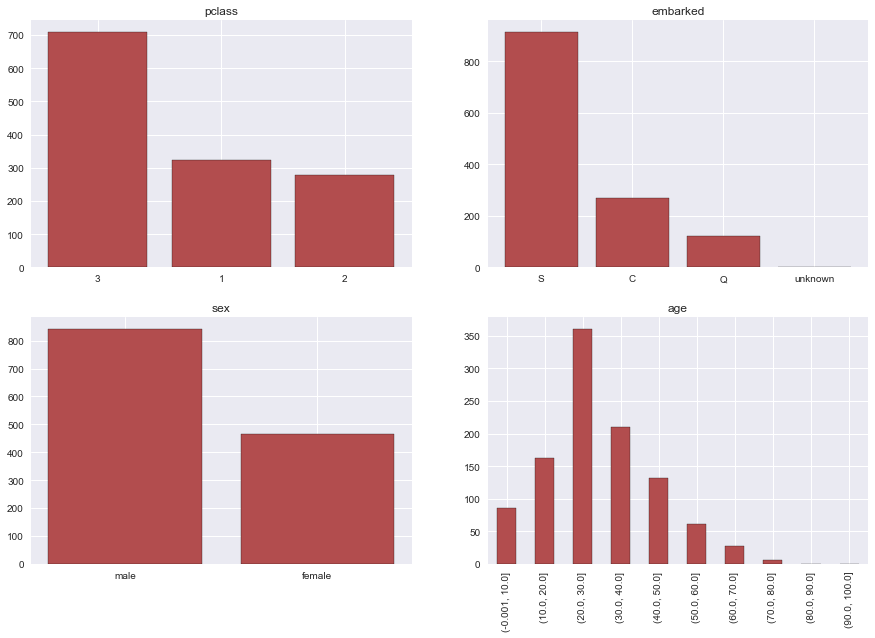

In [19]:
def bar_plot(df, category):
    counts = df[category].value_counts()
    plt.bar(range(len(counts)), counts.values, align='center', edgecolor="k")
    plt.xticks(range(len(counts)), counts.index.values, size='small')
    plt.title(category)
    
plt.figure(figsize = (15,10))
plt.subplot(221)
bar_plot(categ_titanic, 'pclass')
plt.subplot(222)
bar_plot(categ_titanic, 'embarked')
plt.subplot(223)
bar_plot(categ_titanic, 'sex')
plt.subplot(224)
bins= [i*10 for i in range(11)]
out = pd.cut(categ_titanic['age'], bins=bins, include_lowest=True)
out.value_counts(sort=False).plot.bar(edgecolor = 'k')
plt.title('age')
plt.show()  

### 3.3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.

u    0.775401
C    0.071811
B    0.049656
D    0.035141
E    0.031322
A    0.016807
F    0.016043
G    0.003820
Name: cabin, dtype: float64


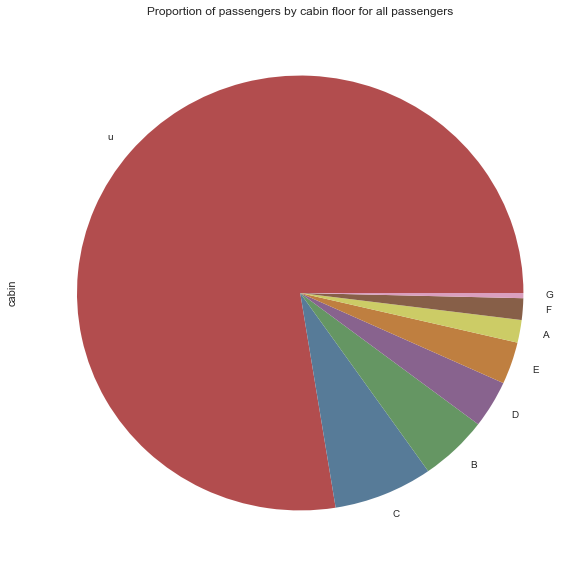

In [20]:
# Extract the cabin floors from the first letter of the cabins
cabin_floors = categ_titanic.cabin.str[0]

# Compute the total number of passengers
num_passengers = len(cabin_floors.tolist())
# Get the number of passengers per floor and compute the proportions
cabin_floors_proportions = cabin_floors.value_counts()/num_passengers
print(cabin_floors_proportions)

plt.figure(figsize = (10,10))
cabin_floors_proportions.plot.pie()
plt.title('Proportion of passengers by cabin floor for all passengers')

C    0.319728
B    0.221088
D    0.156463
E    0.139456
A    0.074830
F    0.071429
G    0.017007
Name: cabin, dtype: float64


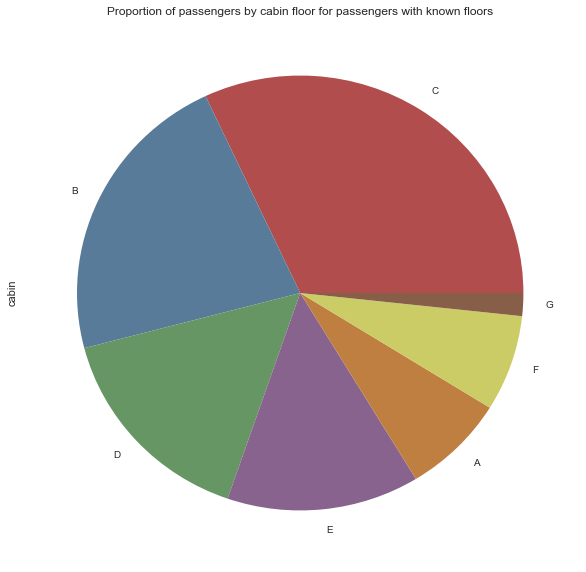

In [21]:
# Extract the cabin floors from the first letter of the cabins
cabin_floors = categ_titanic.cabin.str[0]
cabin_floors = cabin_floors[cabin_floors.str.contains("u|T") == False]

# Compute the total number of passengers
num_passengers = len(cabin_floors.tolist())
# Get the number of passengers per floor and compute the proportions
cabin_floors_proportions = cabin_floors.value_counts()/num_passengers
print(cabin_floors_proportions)

plt.figure(figsize = (10,10))
cabin_floors_proportions.plot.pie()
plt.title('Proportion of passengers by cabin floor for passengers with known floors')

### 3.4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.

In [22]:
def compute_survival_proportions(df, by_category):
    # Groupe the passengers by travel class
    travel_classes = df.groupby(by_category)
    # Get the average of passengers that survived for each class
    survival_per_class = travel_classes[['survived']].mean()
    survival_per_class['died'] = 1-survival_per_class
    print(survival_per_class)
    return survival_per_class

        survived      died
pclass                    
1       0.619195  0.380805
2       0.429603  0.570397
3       0.255289  0.744711


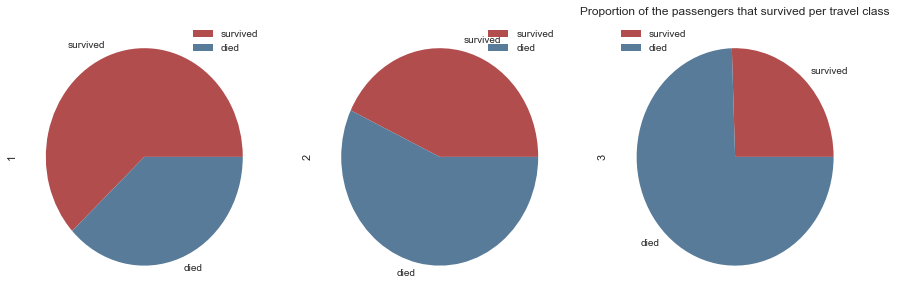

In [23]:
survival_class = compute_survival_proportions(categ_titanic, ['pclass'])
suvival_class_transpose = survival_class.transpose()

suvival_class_transpose.plot.pie(subplots = True, figsize = (15,5))
plt.title('Proportion of the passengers that survived per travel class')

### 3.5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.

               survived      died
pclass sex                       
1      female  0.965278  0.034722
       male    0.340782  0.659218
2      female  0.886792  0.113208
       male    0.146199  0.853801
3      female  0.490741  0.509259
       male    0.152130  0.847870


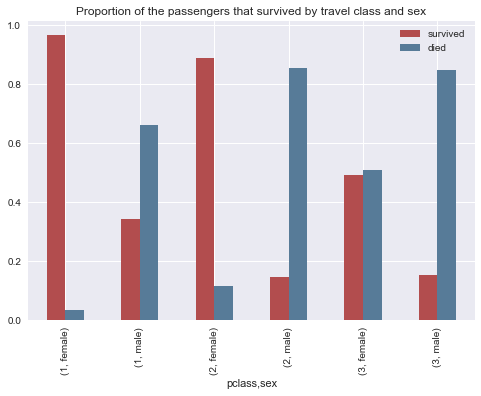

In [24]:
survival_class_sex = compute_survival_proportions(categ_titanic, ['pclass', 'sex'])
plt.figure(figsize = (10,10))
survival_class_sex.plot.bar()
plt.title('Proportion of the passengers that survived by travel class and sex')

### 3.6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [25]:
# Compute the median
median_age = categ_titanic['age'].median(skipna = True)
print("Number of passengers with the median age :",(categ_titanic['age'] == median_age).sum()) 

('Number of passengers with the median age :', 32)


There are too many people with the median age. It is not possible to cut based on the median and obtain equal sized categories. 

In [26]:
# Sort by age
age_sorted = categ_titanic.sort_values(['age'])
# Keep rows where age is not nan
age_sorted = age_sorted[np.isfinite(age_sorted['age'])]
# Get the number of passengers for which the age is given
num_passengers = len(age_sorted['age'].tolist())
# Break up the dataframe into two equal proportions by age category : young and old
age_sorted.loc[:(num_passengers//2),'age_categ']= 'young'
age_sorted.loc[(num_passengers//2):,'age_categ']= 'old'
#----------------------------------------------------------------------------------------------------

# Plot the survival proportions
survival_age_class_sex = compute_survival_proportions(age_sorted, ['age_categ','pclass', 'sex'])
print("Index is unique: ",survival_age_class_sex.index.is_unique)

                         survived      died
age_categ pclass sex                       
old       1      female  0.963964  0.036036
                 male    0.333333  0.666667
          2      female  0.871429  0.128571
                 male    0.080645  0.919355
          3      female  0.467532  0.532468
                 male    0.157407  0.842593
young     1      female  0.954545  0.045455
                 male    0.538462  0.461538
          2      female  0.939394  0.060606
                 male    0.382353  0.617647
          3      female  0.480000  0.520000
                 male    0.187970  0.812030
('Index is unique: ', True)
